In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns


In [4]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

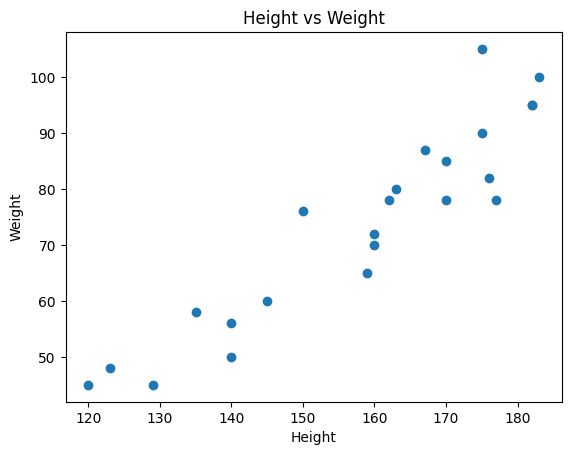

In [5]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')    
plt.title('Height vs Weight')

In [6]:
#Splitting my dataset into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [27]:
#standardizing the training data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:
# Creating an ML model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
print(f"The coefficients of the lins is {round(regressor.coef_[0],3)} and the intercept is {round(regressor.intercept_,3)}")

The coefficients of the lins is 17.646 and the intercept is 154.778


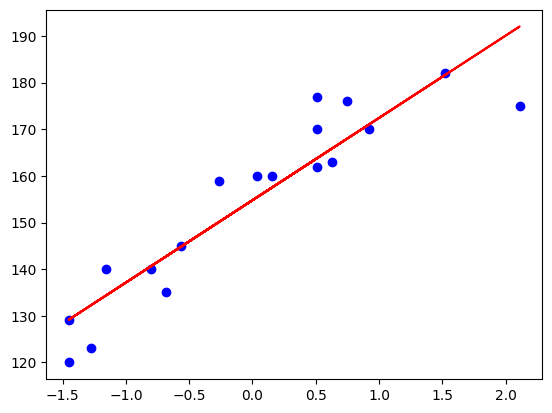

In [30]:
#Graphical interpretation of the line of best fit
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')

In [31]:
#Predicting the test set results
y_pred = regressor.predict(X_test)
#Comparing the predicted and actual values
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})



In [32]:
#Evaluating the model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {round(mse,3)}")
print(f"R-squared: {round(r2,3)}")
print(f"Mean Absolute Error: {round(mae,3)}")
print(f"Mean Absolute Percentage Error: {round(mape,3)}")
print(f"Model Accuracy: {round((1-mape)*100,2)}%")


Mean Squared Error: 37.968
R-squared: 0.742
Mean Absolute Error: 4.671
Mean Absolute Percentage Error: 0.029
Model Accuracy: 97.1%


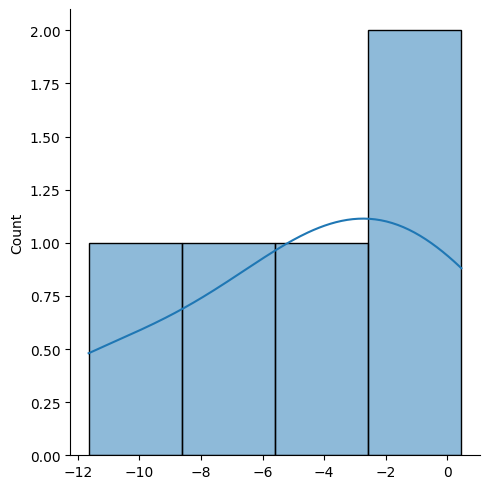

In [33]:
#Residual analysis
residuals = y_test - y_pred
sns.displot(residuals, kde=True)

In [40]:
#Any value that needs to be predicted fist needs to be standardized before being fed into the model
new_weight = 70
new_weight_scaled = sc.transform([[new_weight]])
predicted_height = regressor.predict(new_weight_scaled)
print(f"The predicted height for weight of {new_weight} kg is approximately {round(predicted_height[0],2)} cm.")

The predicted height for weight of 70 kg is approximately 155.36 cm.
